In [333]:
import pandas as pd
import numpy as np



data = pd.read_csv('spam.csv', encoding='latin-1')

# Drop columns with names starting with 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data.columns = ['label', 'message']
# View cleaned DataFrame
print(data.head())



  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [334]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [335]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [336]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [337]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

data


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


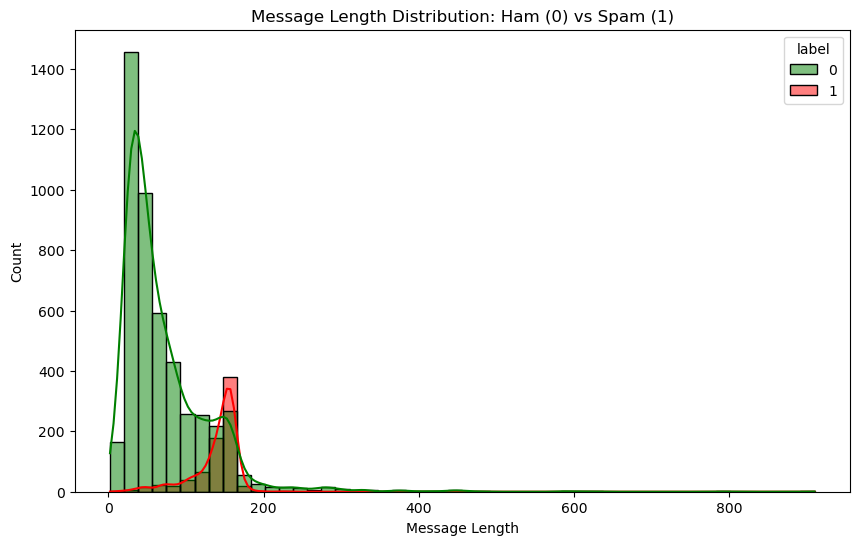

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
data['length'] = data['message'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data=data, x='length', hue='label', bins=50, kde=True, palette={0: 'green', 1: 'red'})
plt.title('Message Length Distribution: Ham (0) vs Spam (1)')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


In [339]:

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download stopwords if needed
import nltk
nltk.download('stopwords')
nltk.download('punkt')

print()


[nltk_data] Downloading package stopwords to /Users/ahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [340]:
url_pattern = re.compile(r'https?://\S+')
# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
data['message'] = data['message'].apply(remove_urls)


data = data.replace(to_replace=r'\d', value='', regex=True)


# Define text processing function
def text_process(message):
    if isinstance(message, str):
        # Convert text to lowercase
        message = message.lower()
        
        # Remove punctuation
        message = ''.join([char for char in message if char not in string.punctuation])
        
        # Remove stopwords
        stop_words = set(stopwords.words('english')) | {'u', 'im' , 'å£' , 'ur'}
        message = ' '.join([word for word in message.split() if word not in stop_words])
    
    return message

# Apply text processing to the 'message' column
data['clean_msg'] = data['message'].apply(text_process)

# View the cleaned data
print(data.head())





   label                                            message  length  \
0      0  Go until jurong point, crazy.. Available only ...     111   
1      0                      Ok lar... Joking wif u oni...      29   
2      1  Free entry in  a wkly comp to win FA Cup final...     155   
3      0  U dun say so early hor... U c already then say...      49   
4      0  Nah I don't think he goes to usf, he lives aro...      61   

                                           clean_msg  
0  go jurong point crazy available bugis n great ...  
1                              ok lar joking wif oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                    dun say early hor c already say  
4        nah dont think goes usf lives around though  


In [341]:
from collections import Counter

# Select 'ham' messages (label '0') and split them into words
ham_words = Counter()

# Apply lambda to split each clean_msg into a list of words
words = data[data.label == 0].clean_msg.apply(lambda x: x.split())

# Update the counter with words from each message
for msg in words:
    ham_words.update(msg)

# Display the 50 most common words
print(ham_words.most_common(50))


[('get', 307), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 249), ('ill', 236), ('got', 232), ('know', 232), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('day', 191), ('time', 189), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 135), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('dear', 97), ('work', 96), ('wat', 95)]


In [342]:

words = data[data.label == 1].clean_msg.apply(lambda x: x.split())

# Update the counter with words from each message
spam_words = Counter()
for msg in words:
    spam_words.update(msg)

# Display the 50 most common words
print(spam_words.most_common(50))


[('call', 349), ('free', 219), ('txt', 150), ('mobile', 124), ('text', 121), ('stop', 116), ('claim', 113), ('reply', 101), ('prize', 92), ('get', 83), ('p', 70), ('nokia', 69), ('new', 69), ('send', 67), ('urgent', 63), ('cash', 62), ('win', 61), ('contact', 56), ('service', 55), ('please', 54), ('guaranteed', 50), ('customer', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 46), ('box', 45), ('ppm', 44), ('chat', 43), ('awarded', 38), ('draw', 38), ('mins', 38), ('latest', 36), ('line', 35), ('receive', 33), ('camera', 33), ('go', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('st', 30), ('apply', 30), ('pobox', 30), ('po', 30), ('number', 30), ('code', 29), ('live', 29), ('want', 29)]


In [343]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [344]:
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = data.clean_msg
y = data.label
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7218)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7218)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [346]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [347]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9834888729361091
=======Confision Matrix===========


array([[1205,    8],
       [  15,  165]])